In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random
import os

In [100]:
df= pd.read_csv('shampoo.csv')
df.head()

,Month,Sales
0,1/1/2017 0:00,266.0
1,2/1/2017 0:00,145.9
2,3/1/2017 0:00,183.1
3,4/1/2017 0:00,119.3
4,5/1/2017 0:00,180.3


In [12]:
df = df.rename(columns={'Sales': 'y', 'Month':'ds'})
df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
df['y'] = np.log(df['y'])
model = Prophet() #instantiate Prophet
model.fit(df)

18:46:31 - cmdstanpy - INFO - Chain [1] start processing
18:46:32 - cmdstanpy - INFO - Chain [1] done processing


In [14]:

''' {'year': 'A',
    'quarter': 'Q',
    'month': 'M',
    'day': 'D',
    'hour': 'H',
    'minute': 'T',
    'second': 'S',
    'millisecond': 'L',
    'microsecond': 'U',
    'nanosecond': 'N'}
'''
    
    
future_data = model.make_future_dataframe(periods=10, freq = 'M')
future_data
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)



,ds,yhat,yhat_lower,yhat_upper
36,2019-12-31,1.641286,1.608974,1.676304
37,2020-01-31,2.041112,2.008076,2.078766
38,2020-02-29,1.817627,1.782781,1.853933
39,2020-03-31,1.955034,1.921189,1.986916
40,2020-04-30,1.851831,1.821306,1.885084
41,2020-05-31,1.904000,1.872445,1.938908
42,2020-06-30,1.910682,1.877735,1.944361
43,2020-07-31,1.863882,1.831218,1.897368
44,2020-08-31,1.994360,1.959780,2.027926
45,2020-09-30,1.998252,1.963433,2.034622


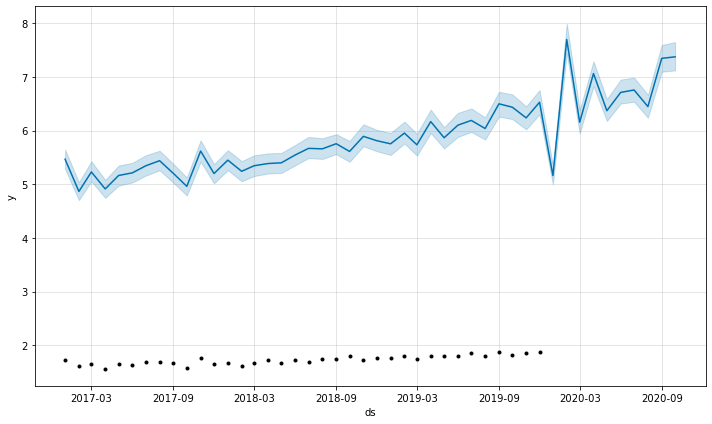

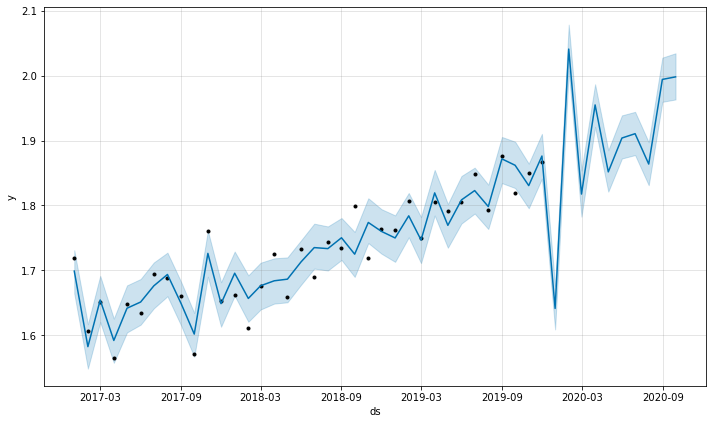

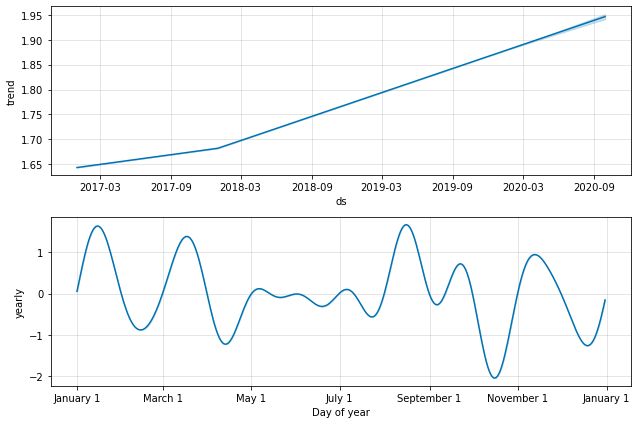

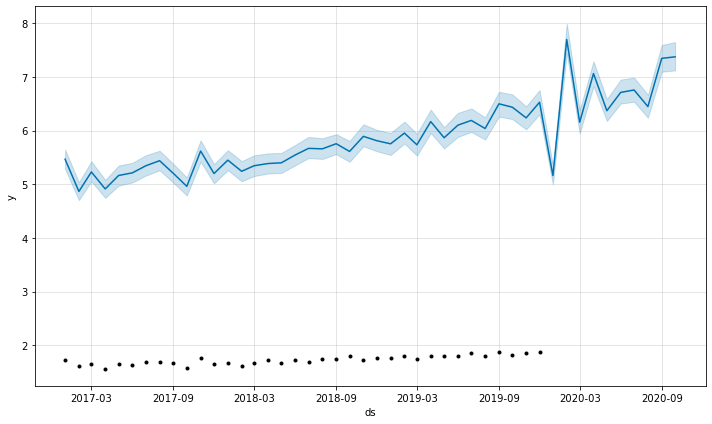

In [15]:
    model.plot(forecast_data) 
    model.plot_components(forecast_data)
    forecast_data_orig = forecast_data # make sure we save the original forecast data
    forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
    forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
    forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])
    model.plot(forecast_data_orig)


In [19]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']
final_df = pd.DataFrame(forecast_data_orig)
final_df_1=final_df[['ds','yhat']].tail(10)
final_df_1 = final_df_1.rename(columns={'yhat': 'Sales', 'ds':'Month'})
rmse = mean_squared_error(df["y_orig"].iloc[24:], final_df['yhat'].iloc[24:36])**0.5
print('Test MSE: %.3f' % rmse)

Test MSE: 0.119


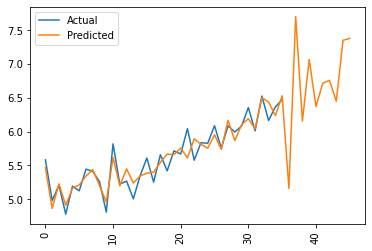

In [28]:
fig,ax=plt.subplots(nrows=1, ncols=1)
ax.plot(df["y_orig"],label="Actual")
ax.plot(final_df["yhat"],label="Predicted")
ax.legend()
plt.xticks(rotation=90)
plt.show()
# n=random.randint(0,1000000000000)
# n=str(n)
# fig.savefig(os.path.join(app.config["IMAGE_UPLOADS"],n+'time_series.png'))  
# full_filename= os.path.join(app.config["IMAGE_UPLOADS"],n+'time_series.png')   
            
#return 'nothing'
# return render_template('home.html',user_image = full_filename,tables=[final_df_1.to_html(classes='forecast')],titles=['na','forecast'],query1 = request.form['query1'],query2 = request.form['query2'],query3 = request.form['query3'])
    


# Forecasting sales using RandomForest

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
# # Set a seed for reproducibility
# np.random.seed(42)
# # Generate a date range from January 2016 to December 2020
# date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')
# # Generate random sales values
# sales_values = np.random.randint(1000, 5000, size=len(date_range))

# # Create the DataFrame
# sales_df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})

# # Print the DataFrame
# df= sales_df.copy()
# df.head()


In [106]:
df['Month']= pd.to_datetime(df['Month'])
df

,Month,Sales
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3
5,2017-06-01,168.5
6,2017-07-01,231.8
7,2017-08-01,224.5
8,2017-09-01,192.8
9,2017-10-01,122.9


In [108]:
model = RandomForestRegressor() #instantiate Prophet
model.fit(df[['Month']],df['Sales'])


RandomForestRegressor()

In [109]:
# pd.DataFrame({'Month': pd.date_range(start=df.index[-1]+pd.DateOffset(months=1), periods=5, freq='M')})
future_data=pd.DataFrame({"Month":pd.date_range(start=df['Month'].max() + pd.DateOffset(months=1), periods=12, freq='MS')})

In [110]:
forecast_data = model.predict(future_data[['Month']])
future_data['forecasted']=forecast_data

In [111]:
# Concatenate the initial DataFrame and the forecast DataFrame
# merged_df = df.merge(future_data, on='Month', how='outer')
df_final=pd.concat([df, future_data], ignore_index=True)
df_final

,Month,Sales,forecasted
0,2017-01-01,266.0,NaN
1,2017-02-01,145.9,NaN
2,2017-03-01,183.1,NaN
3,2017-04-01,119.3,NaN
4,2017-05-01,180.3,NaN
5,2017-06-01,168.5,NaN
6,2017-07-01,231.8,NaN
7,2017-08-01,224.5,NaN
8,2017-09-01,192.8,NaN
9,2017-10-01,122.9,NaN


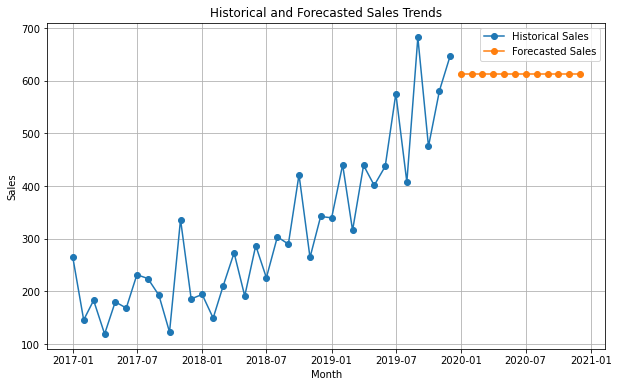

In [112]:
# Plot the historical sales and forecasted trends
plt.figure(figsize=(10, 6))
plt.plot(df_final['Month'], df_final['Sales'], label='Historical Sales', marker='o')
plt.plot(df_final['Month'], df_final['forecasted'], label='Forecasted Sales', marker='o')
plt.title('Historical and Forecasted Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

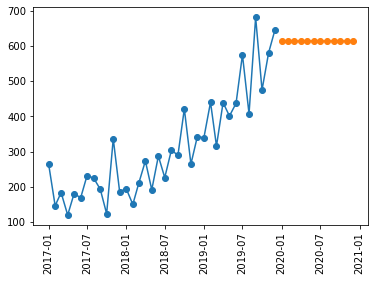

In [115]:
    fig,ax=plt.subplots(nrows=1, ncols=1)
    # plt.figure(figsize=(10, 6))
    ax.plot(df_final['Month'], df_final['Sales'], label='Historical Sales', marker='o')
    ax.plot(df_final['Month'], df_final['forecasted'], label='Forecasted Sales', marker='o')
    # ax.title('Historical and Forecasted Sales Trends')
    # ax.xlabel('Month')
    # ax.ylabel('Sales')
    # ax.legend()
    # plt.grid(True)
    plt.xticks(rotation=90)
    plt.show()
    fig.savefig('time_series.jpg')
